Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

from trendlines import fit_trendlines_single
from trendlines import mapear_retas_com_bottoms
from trendlines import mapear_retas_com_tops
from trendlines import identifica_retas_similares_suporte
from trendlines import identifica_retas_similares_resistencia
from tops_e_bottoms import checa_tops
from tops_e_bottoms import checa_bottoms
from calcula_RSI import compute_rsi

In [23]:
# janela_rsi determina o número de amostras sobre os quais o RSI é calculado
janela_rsi = 21

# ordem determina quantos pontos à direita e à esquerda examinamos para determina pontos de máximo (tops) e mínimos (bottoms) locais
ordem = 3

# lookback determina o tamanho da janela de inspeção que será usada para encontrar as linhas de tendências
lookback1 = 40
lookback2 = 100
lookback3 = 200
lookback4 = 300

# distancia_maxima determina a distancia máxima na vertical que uma linha deve passar para considerar que passou pelo ponto
distancia_maxima = 3

# num_pontos determina quantos pontos queremos na linha de tendência no mínimo
num_pontos = 3

# ind_indice determina quais variáveis vamos usar para fazer o estudo:
# 1 = bitcoin
# 2 = ibov
# 3 = S&P 500
# 4 = FTSE All Share
# 5  = DAX
# 6 = Nikkei 225

# break_min determina a distãncia mínima na vertical do ropomimento para uma reta ser considerada rompida
break_min = 4

# pontos_para_tras determina quantos pontos para trás eu checo o rompimento
pontos_para_tras = 6

# sl = stop loss e pt = profit taking
sl = -0.02
pt = 0.06

# Escolha do ativo
ind_indice = 2

# datas do intervalo sendo avaliado
start_date = "2000-01-01"
end_date = "2004-12-31"

Setando variáveis e carregando dados

In [24]:
# janela_rsi determina o número de amostras sobre os quais o RSI é calculado
janela_rsi = 21

# ordem determina quantos pontos à direita e à esquerda examinamos para determina pontos de máximo (tops) e mínimos (bottoms) locais
ordem = 3

# lookback determina o tamanho da janela de inspeção que será usada para encontrar as linhas de tendências
lookback1 = 40
lookback2 = 100
lookback3 = 200
lookback4 = 300

# distancia_maxima determina a distancia máxima na vertical que uma linha deve passar para considerar que passou pelo ponto
distancia_maxima = 3

# num_pontos determina quantos pontos queremos na linha de tendência no mínimo
num_pontos = 3

# ind_indice determina quais variáveis vamos usar para fazer o estudo:
# 1 = bitcoin
# 2 = ibov
# 3 = S&P 500
# 4 = FTSE All Share
# 5  = DAX
# 6 = Nikkei 225

# break_min determina a distãncia mínima na vertical do ropomimento para uma reta ser considerada rompida
break_min = 4

# pontos_para_tras determina quantos pontos para trás eu checo o rompimento
pontos_para_tras = 6

# sl = stop loss e pt = profit taking
sl = -0.02
pt = 0.06

# Escolha do ativo
ind_indice = 2

# datas do intervalo sendo avaliado
start_date = "2000-01-01"
end_date = "2004-12-31"

Carregando dados

In [ ]:
indices = {
    1: "BTC-USD",    # Ticker para Bitcoin
    2: "^BVSP",      # Ticker para Ibovespa
    3: "^GSPC",      # Ticker para S&P 500
    4: "^FTSE",      # Ticker para FTSE All Share
    5: "^GDAXI",     # Ticker para DAX
    6: "^N225"       # Ticker para Nikkei 225
}

ticker = indices.get(ind_indice)

if ticker:
    # Importa os dados do Yahoo Finace
    data = yf.download(ticker, start=start_date, end=end_date)

    # Remove caracteres inválidos para nome de arquivo (como "^" no caso de tickers)
    ticker_clean = ticker.replace("^", "")
    
    # Gera o nome do arquivo com base no índice escolhido
    file_name = f'dados_csv_produzidos/dados_originais/data_{ticker_clean}.csv'


else:
    print("Índice inválido")

# Carregando o arquivo CSV
# data = pd.read_csv('dados_csv_produzidos/dados_originais/data_BVSP.csv')

# Converter colunas numéricas (exceto 'Date', que é uma string)
colunas_numericas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Converter as colunas para tipo numérico (ignorar erros caso já esteja no formato correto)
data[colunas_numericas] = data[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Aplicar logaritmo nas colunas numéricas
data_log = np.log(data[colunas_numericas])

data.to_csv(file_name, index=True)


[*********************100%***********************]  1 of 1 completed

passei aqui
Price                     Adj Close    Close     High      Low     Open Volume
Ticker                        ^BVSP    ^BVSP    ^BVSP    ^BVSP    ^BVSP  ^BVSP
Date                                                                          
2000-01-03 00:00:00+00:00   16930.0  16930.0  17408.0  16719.0  17098.0      0
2000-01-04 00:00:00+00:00   15851.0  15851.0  16908.0  15851.0  16908.0      0
2000-01-05 00:00:00+00:00   16245.0  16245.0  16302.0  15350.0  15871.0      0
2000-01-06 00:00:00+00:00   16107.0  16107.0  16499.0  15977.0  16237.0      0
2000-01-07 00:00:00+00:00   16309.0  16309.0  16449.0  16125.0  16125.0      0
...                             ...      ...      ...      ...      ...    ...
2004-12-23 00:00:00+00:00   25878.0  25878.0  25971.0  25618.0  25719.0      0
2004-12-27 00:00:00+00:00   25937.0  25937.0  26084.0  25862.0  25862.0      0
2004-12-28 00:00:00+00:00   26117.0  26117.0  26145.0  25919.0  25937.0      0
2004-12-29 00:00:00+00:00   26161.0  261


c:\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Cálculo do RSI

In [26]:


data['RSI'] = compute_rsi(data_log['Close'],janela_rsi)
rsi_values = compute_rsi(data_log['Close'], janela_rsi)

close_df = pd.DataFrame(data_log['Close'])

rsi_df = pd.DataFrame(data['RSI'])

file_name = f'dados_csv_produzidos/dados_rsi/rsi_values_{ticker_clean}.csv'

rsi_df.to_csv(file_name, index=True)

Ticker                        ^BVSP
Date                               
2000-01-03 00:00:00+00:00       NaN
2000-01-04 00:00:00+00:00       NaN
2000-01-05 00:00:00+00:00       NaN
2000-01-06 00:00:00+00:00       NaN
2000-01-07 00:00:00+00:00       NaN
...                             ...
2004-12-23 00:00:00+00:00  0.003295
2004-12-27 00:00:00+00:00  0.003295
2004-12-28 00:00:00+00:00  0.003295
2004-12-29 00:00:00+00:00  0.003022
2004-12-30 00:00:00+00:00  0.003022

[1241 rows x 1 columns]
Ticker                        ^BVSP
Date                               
2000-01-03 00:00:00+00:00       NaN
2000-01-04 00:00:00+00:00       NaN
2000-01-05 00:00:00+00:00       NaN
2000-01-06 00:00:00+00:00       NaN
2000-01-07 00:00:00+00:00       NaN
...                             ...
2004-12-23 00:00:00+00:00  0.003295
2004-12-27 00:00:00+00:00  0.003295
2004-12-28 00:00:00+00:00  0.003295
2004-12-29 00:00:00+00:00  0.003022
2004-12-30 00:00:00+00:00  0.003022

[1241 rows x 1 columns]


Encontrando Topos e Fundos do RSI

In [27]:
tops = []
bottoms = []
# top[0] = index of top
# top[1] = price of top
# bottom[0] = index of bottom
# bottom[1] = price of bottom

for i in range(janela_rsi + ordem - 1, len(data['RSI']) - ordem - 1):
    if checa_tops(data['RSI'], i, ordem):
        top = [i, data['RSI'][i]]
        tops.append(top)

for i in range(janela_rsi + ordem - 1, len(data['RSI']) - ordem - 1):
    if checa_bottoms(data['RSI'], i, ordem):
        bottom = [i, data['RSI'][i]]
        bottoms.append(bottom)

tops_df = pd.DataFrame(tops, columns=['top_bottom_idx', 'top_bottom_value'])
tops_df = tops_df.dropna(subset=['top_bottom_value'])
file_name = f'dados_csv_produzidos/minimos_maximos_locais/maximos_locais_{ticker_clean}.csv'
tops_df.to_csv(file_name, index=True)

bottoms_df = pd.DataFrame(bottoms, columns=['top_bottom_idx', 'top_bottom_value'])
bottoms_df = bottoms_df.dropna(subset=['top_bottom_value'])
file_name = f'dados_csv_produzidos/minimos_maximos_locais/minimos_locais_{ticker_clean}.csv'
bottoms_df.to_csv(file_name, index=True)



c:\Users\fabio\Dropbox\FGV\Dissertação\Projeto\Lista-2\tops_e_bottoms.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v = data[k]
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\873677519.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top = [i, data['RSI'][i]]
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\873677519.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom = [i, data['RSI'][i]]


Primeiro gráfico  Mínimos_Máximos_Ativo

C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\3578705427.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=1)
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\3578705427.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=1)


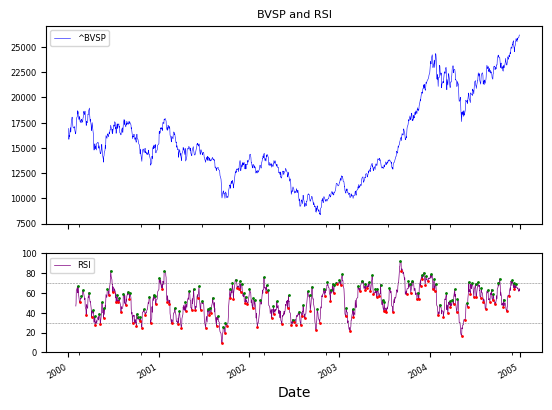

In [28]:
idx = data.index

plt.style.use('default')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker_clean + ' Close Price', linewidth = 0.4)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)

# ----------------------------------------------------------------   
# Plotando o as linhas de sobrecompra (RSI = 70) e sobrevenda (RSI = 30)
# ----------------------------------------------------------------   
ax3.axhline(70, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrecompra
ax3.axhline(30, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)
ax1.legend(loc='upper left', fontsize=6)
ax3.legend(loc='upper left', fontsize=6)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100



# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=1)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=1)

# ----------------------------------------------------------------
# Ajustar o título e diminuir o tamanho da fonte
# ----------------------------------------------------------------
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)

# ----------------------------------------------------------------
# Reduzir o tamanho da fonte dos valores da escala
# ----------------------------------------------------------------
ax1.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax1
ax3.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax3

# ----------------------------------------------------------------
# Salvar e plotar
# ----------------------------------------------------------------

file_name = f'graficos_gerados/mínimos_máximos_{ticker_clean}.png'
fig.savefig(file_name, dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

Construção das retas de suporte para as janelas de observação

In [29]:
#Construção das retas de suporte para as janelas de observação

# Estabelecendo contador e ponto inicial
contador_janela = 0
borda_esquerda = bottoms_df['top_bottom_idx'].iloc[0]

# Inicializar DataFrames
support_slope = [np.nan] * len(rsi_values)
colunas_resistencia = ['indice', 'indice_original_upper_pivot','valor_rsi', 'resist_slope', 'resist_intercept', 'inicio_janela', 'fim_janela']
colunas_suporte     = ['indice', 'indice_original_lower_pivot', 'valor_rsi', 'support_slope', 'support_intercept', 'inicio_janela', 'fim_janela']

trendlines_suporte_df = pd.DataFrame(columns=colunas_suporte)

# for x in [lookback1, lookback2, lookback3, lookback4]:
for x in [lookback1]:
    lookback = x
    borda_esquerda = bottoms_df['top_bottom_idx'].iloc[0]-ordem
    while borda_esquerda + lookback < len(rsi_values):
    
        subset_tops_df = bottoms_df[(bottoms_df['top_bottom_idx'] >= borda_esquerda) & (bottoms_df['top_bottom_idx'] <= borda_esquerda+lookback-ordem)]

        # Chamar a função fit_trendlines_single para a janela sendo avaliada
        lower_pivot, lower_pivot_y, suport_slope_1, suport_slope_2 = fit_trendlines_single(rsi_values[borda_esquerda:borda_esquerda+lookback], borda_esquerda, subset_tops_df, True)
        
        if suport_slope_1 != None:     
            nova_linha_suporte_1 = {
                'indice': contador_janela,
                'indice_original_lower_pivot': lower_pivot,
                'valor_rsi': lower_pivot_y,
                'support_slope': suport_slope_1,
                'support_intercept':lower_pivot_y - lower_pivot * suport_slope_1,
                'inicio_janela': borda_esquerda,
                'fim_janela':borda_esquerda + lookback - 1
            }
            trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte_1, ignore_index=True)        
            contador_janela += 1

        if suport_slope_2 != None:
            nova_linha_suporte_2 = {
                'indice': contador_janela,
                'indice_original_lower_pivot': lower_pivot,
                'valor_rsi': lower_pivot_y,
                'support_slope': suport_slope_2,
                'support_intercept':lower_pivot_y - lower_pivot * suport_slope_2,
                'inicio_janela': borda_esquerda,
                'fim_janela':borda_esquerda + lookback - 1
            }
            trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte_2, ignore_index=True)        
            contador_janela += 1     
        
        try:
            proximo_esquerda = bottoms_df.loc[bottoms_df['top_bottom_idx'].gt(borda_esquerda), 'top_bottom_idx'].min()
            rolagem_1 = proximo_esquerda - borda_esquerda
        except IndexError:
            proximo_esquerda = None  # Ou qualquer valor padrão que você queira usar

        try:
            proximo_direita = bottoms_df.loc[bottoms_df['top_bottom_idx'].gt(borda_esquerda+lookback), 'top_bottom_idx'].min()
            rolagem_2 = proximo_direita - (borda_esquerda + lookback)
        except IndexError:
            proximo_direita = None  # Ou qualquer valor padrão que você queira usar

        if proximo_esquerda == None:
            if proximo_direita == None:
                break
            else:
                rolagem = rolagem_2
        else:
            if proximo_direita == None:
                rolagem = rolagem_1
            else:
                rolagem = min(rolagem_1,rolagem_2)
                
        borda_esquerda = borda_esquerda + rolagem

    trendlines_suporte_df.to_csv('dados_csv_produzidos/trendlines_iniciais/trendlines_suporte.csv', index=True)


c:\Users\fabio\Dropbox\FGV\Dissertação\Projeto\Lista-2\trendlines.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tops_bottoms_df.loc[:, 'diferenca'] = line_points_tops_bottoms - tops_bottoms_df['top_bottom_value']
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\601697033.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte_1, ignore_index=True)
c:\Users\fabio\Dropbox\FGV\Dissertação\Projeto\Lista-2\trendlines.py:161: Set

Criando as linhas de resistência para as Janelas de Inspeção

In [30]:
# Criando as linhas de resistência para as Janelas de Inspeção

# Estabelecendo contador e ponto inicial
contador_janela = 0
borda_esquerda = tops_df['top_bottom_idx'].iloc[0]

# Inicializar DataFrames

resist_slope = [np.nan] * len(rsi_values)
colunas_resistencia = ['indice', 'indice_original_upper_pivot','valor_rsi', 'resist_slope', 'resist_intercept', 'inicio_janela', 'fim_janela']
trendlines_resistencia_df = pd.DataFrame(columns=colunas_resistencia)

# for x in [lookback1, lookback2, lookback3, lookback4]:
for x in [lookback1]:
    lookback = x
    borda_esquerda = tops_df['top_bottom_idx'].iloc[0] - ordem # Começa no primeiro máximo local
    while borda_esquerda + lookback < len(rsi_values):
    
        # Fatia os tops e mínimos locais conforme a janela
        subset_tops_df = tops_df[(tops_df['top_bottom_idx'] >= borda_esquerda) & (tops_df['top_bottom_idx'] <= borda_esquerda+lookback)]

        # Chamar a função fit_trendlines_single para a janela sendo avaliada
        upper_pivot, upper_pivot_y, resist_slope_1, resist_slope_2 = fit_trendlines_single(rsi_values[borda_esquerda:borda_esquerda+lookback], borda_esquerda, subset_tops_df, False)
        
        if resist_slope_1 != None:
            
            nova_linha_resistencia_1 = {
                'indice': contador_janela,
                'indice_original_upper_pivot': upper_pivot,
                'valor_rsi': upper_pivot_y,
                'resist_slope': resist_slope_1,
                'resist_intercept':upper_pivot_y - upper_pivot * resist_slope_1,
                'inicio_janela': borda_esquerda,
                'fim_janela':borda_esquerda + lookback - 1
            }
            trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia_1, ignore_index=True)
            
            contador_janela += 1

        if resist_slope_2 != None:    
            nova_linha_resistencia_2 = {
                'indice': contador_janela,
                'indice_original_upper_pivot': upper_pivot,
                'valor_rsi': upper_pivot_y,
                'resist_slope': resist_slope_2,
                'resist_intercept':upper_pivot_y - upper_pivot * resist_slope_2,
                'inicio_janela': borda_esquerda,
                'fim_janela':borda_esquerda + lookback - 1
            }
            trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia_2, ignore_index=True)

            contador_janela += 1

        # 5Rola a janela a maior distância possível até pegar o próximo máximo

        try:
            proximo_esquerda = tops_df.loc[tops_df['top_bottom_idx'].gt(borda_esquerda), 'top_bottom_idx'].min()
            rolagem_1 = proximo_esquerda - borda_esquerda
        except IndexError:
            proximo_esquerda = None  # Ou qualquer valor padrão que você queira usar

        try:
            proximo_direita = tops_df.loc[tops_df['top_bottom_idx'].gt(borda_esquerda+lookback), 'top_bottom_idx'].min()
            rolagem_2 = proximo_direita - (borda_esquerda + lookback)
        except IndexError:
            proximo_direita = None  # Ou qualquer valor padrão que você queira usar

        if proximo_esquerda == None:
            if proximo_direita == None:
                break
            else:
                rolagem = rolagem_2
        else:
            if proximo_direita == None:
                rolagem = rolagem_1
            else:
                rolagem = min(rolagem_1,rolagem_2)
        
        borda_esquerda = borda_esquerda + rolagem
    
trendlines_resistencia_df.to_csv('dados_csv_produzidos/trendlines_iniciais/trendlines_resistencia.csv', index=True)

c:\Users\fabio\Dropbox\FGV\Dissertação\Projeto\Lista-2\trendlines.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tops_bottoms_df.loc[:, 'diferenca'] = tops_bottoms_df['top_bottom_value'] - line_points_tops_bottoms
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\39516533.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia_2, ignore_index=True)
c:\Users\fabio\Dropbox\FGV\Dissertação\Projeto\Lista-2\trendlines.

Plotando grafico com as retas sem eliminação

C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\264160896.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.5)
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\264160896.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.5)


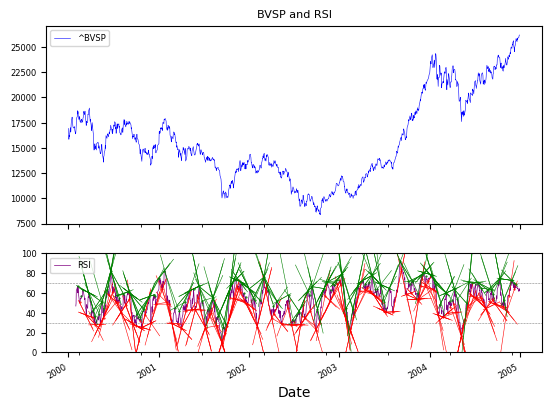

In [31]:
plt.style.use('default')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker_clean + ' Close Price', linewidth = 0.4)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)

# ----------------------------------------------------------------   
# Plotando o as linhas de sobrecompra (RSI = 70) e sobrevenda (RSI = 30)
# ----------------------------------------------------------------   
ax3.axhline(70, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrecompra
ax3.axhline(30, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)
ax1.legend(loc='upper left', fontsize=6)
ax3.legend(loc='upper left', fontsize=6)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.5)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.5)

# ----------------------------------------------------------------
# Ajustar o título e diminuir o tamanho da fonte
# ----------------------------------------------------------------
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)

# ----------------------------------------------------------------
# Reduzir o tamanho da fonte dos valores da escala
# ----------------------------------------------------------------
ax1.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax1
ax3.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax3


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(trendlines_suporte_df)):
    row = trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = int(row['fim_janela'])
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.4)

# ----------------------------------------------------------------


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(trendlines_resistencia_df)):
    row = trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = int(row['fim_janela'])
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.4)

# ----------------------------------------------------------------
# Salvar e plotar
# ----------------------------------------------------------------

file_name = f'graficos_gerados/primeiras_retas_{ticker_clean}.png'
fig.savefig(file_name, dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------

Eliminando as retas pelo sinal Slope

In [32]:
# slope_ok_trendlines_suporte_df = trendlines_suporte_df.loc[trendlines_suporte_df['support_slope'] > 0]
# slope_ok_trendlines_suporte_df = slope_ok_trendlines_suporte_df.reset_index(drop=True)
# # slope_ok_trendlines_suporte_df.to_csv('dados_csv_produzidos/slope_ok_trendlines_suporte.csv', index=True)

# slope_ok_trendlines_resistencia_df = trendlines_resistencia_df.loc[trendlines_resistencia_df['resist_slope'] < 0]
# # slope_ok_trendlines_resistencia_df = slope_ok_trendlines_resistencia_df.reset_index(drop=True)
# slope_ok_trendlines_resistencia_df.to_csv('dados_csv_produzidos/slope_ok_trendlines_resistencia.csv', index=True)


Plotando grafico com as retas após a eliminação de slope

In [33]:
# plt.style.use('default')
# fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# # ----------------------------------------------------------------   
# # Plotando o preço de fechamento
# # ----------------------------------------------------------------   

# data['Close'].plot(ax=ax1, color='blue', label=ticker_clean + ' Close Price', linewidth = 0.4)

# # ----------------------------------------------------------------   
# # Plotando o RSI
# # ----------------------------------------------------------------   

# data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)

# # ----------------------------------------------------------------   
# # Plotando o as linhas de sobrecompra (RSI = 70) e sobrevenda (RSI = 30)
# # ----------------------------------------------------------------   
# ax3.axhline(70, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrecompra
# ax3.axhline(30, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrevenda

# plt.legend()
# ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)
# ax1.legend(loc='upper left', fontsize=6)
# ax3.legend(loc='upper left', fontsize=6)
# ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# # ----------------------------------------------------------------   
# # Plotar os topos e fundos no gráfico
# # ----------------------------------------------------------------   

# for top in tops_df.itertuples():
#     # Plotar cada topo no gráfico RSI usando a data correspondente
#     ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.3)

# for bottom in bottoms_df.itertuples():
#     # Plotar cada fundo no gráfico RSI usando a data correspondente
#     ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.3)

# # ----------------------------------------------------------------
# # Ajustar o título e diminuir o tamanho da fonte
# # ----------------------------------------------------------------
# ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)

# # ----------------------------------------------------------------
# # Reduzir o tamanho da fonte dos valores da escala
# # ----------------------------------------------------------------
# ax1.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax1
# ax3.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax3


# # Obter as datas associadas aos valores do RSI
# datas = data.index[len(data.index) - len(rsi_values):]

# # ----------------------------------------------------------------   
# # Plotar as retas de suporte do RSI
# # ----------------------------------------------------------------   

# for i in range(len(slope_ok_trendlines_suporte_df)):
#     row = slope_ok_trendlines_suporte_df.iloc[i]

#     x_start = int(row['inicio_janela'])
#     y_start = row['support_slope'] * x_start + row['support_intercept']

#     # Ajustar y_start se necessário
#     if y_start < 0:
#         x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
#         y_start = row['support_slope'] * x_start + row['support_intercept']

#     x_end = int(row['fim_janela'])
#     y_end = row['support_slope'] * x_end + row['support_intercept']

#     # Ajustar y_end se necessário
#     if y_end < 0:
#         x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
#         y_end = row['support_slope'] * x_end + row['support_intercept']

#     # Obter datas de início e fim
#     data_start = datas[x_start]
#     data_end = datas[x_end]

#     # Desenhar o segmento de reta
#     ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.4)

# # ----------------------------------------------------------------


# # Obter as datas associadas aos valores do RSI
# datas = data.index[len(data.index) - len(rsi_values):]

# # ----------------------------------------------------------------   
# # Plotar as retas de suporte do RSI
# # ----------------------------------------------------------------   

# for i in range(len(slope_ok_trendlines_resistencia_df)):
#     row = slope_ok_trendlines_resistencia_df.iloc[i]

#     x_start = int(row['inicio_janela'])
#     y_start = row['resist_slope'] * x_start + row['resist_intercept']

#     # Ajustar y_start se necessário
#     if y_start < 0:
#         x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
#         y_start = row['resist_slope'] * x_start + row['resist_intercept']

#     x_end = int(row['fim_janela'])
#     y_end = row['resist_slope'] * x_end + row['resist_intercept']

#     # Ajustar y_end se necessário
#     if y_end < 0:
#         x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
#         y_end = row['resist_slope'] * x_end + row['resist_intercept']

#     # Obter datas de início e fim
#     data_start = datas[x_start]
#     data_end = datas[x_end]

#     # Desenhar o segmento de reta
#     ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.4)

# # ----------------------------------------------------------------
# # Salvar e plotar
# # ----------------------------------------------------------------

# file_name = f'graficos_gerados/retas_com_eliminacao_slope_{ticker_clean}.png'
# fig.savefig(file_name, dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

# plt.show()

# # ----------------------------------------------------------------



Mapeando as retas suporte para encontrar as que passaram por três bottoms até o fim da janela que criou a reta

In [34]:
# Mapeando as retas suporte para encontrar as que passaram por três bottoms até o fim da janela que criou a reta

mapeados_trendlines_suporte_df = mapear_retas_com_bottoms(bottoms_df, trendlines_suporte_df, distancia_maxima, num_pontos)

mapeados_trendlines_suporte_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)

# Eliminando as retas suporte que não foram mapeadas

expurgado_trendlines_suporte_df = mapeados_trendlines_suporte_df[mapeados_trendlines_suporte_df['mapeado'] != 0]

expurgado_trendlines_suporte_df.to_csv('dados_csv_produzidos/expurgado_trendlines_suporte.csv', index=True)


# Mapeando as retas resist6encia para encontrar as que passaram por três tops até o fim da janela que criou a reta

mapeados_trendlines_resistencia_df = mapear_retas_com_tops(tops_df, trendlines_resistencia_df, distancia_maxima, num_pontos)

mapeados_trendlines_resistencia_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)

# Eliminando as retas suporte que não foram mapeadas

expurgado_trendlines_resistencia_df = mapeados_trendlines_resistencia_df[mapeados_trendlines_resistencia_df['mapeado'] != 0]

expurgado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/expurgado_trendlines_resistencia.csv', index=True)


# mapeados_trendlines_suporte_df = mapear_retas_com_bottoms(bottoms_df, slope_ok_trendlines_suporte_df, distancia_maxima, num_pontos)
#
# # mapeados_trendlines_suporte_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)
# mapeados_trendlines_resistencia_df = mapear_retas_com_tops(tops_df, slope_ok_trendlines_resistencia_df, distancia_maxima, num_pontos)
#
# mapeados_trendlines_resistencia_df.to_csv('dados_csv_produzidos/mapeados_trendlines_resistencia.csv', index=True)

Selecionando as retas que passam por (num_pontos=3) pontos de máximo e mínimo até o fim da janela à direita

Plotando o gráfico_2

C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\1672731639.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\1672731639.py:170: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.3)


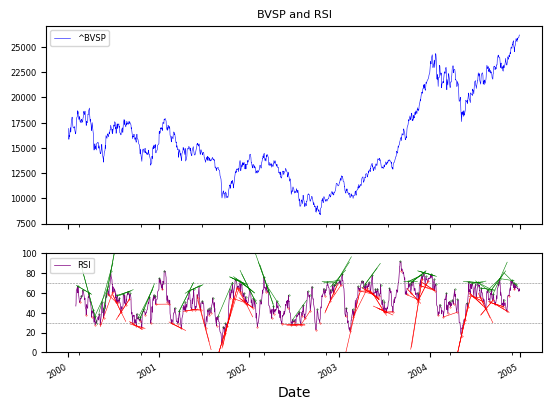

In [35]:
# # __________________________________

# plt.style.use('default')
# fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# # ----------------------------------------------------------------   
# # Plotando o preço de fechamento
# # ----------------------------------------------------------------   

# data['Close'].plot(ax=ax1, color='blue', label=ticker_clean + ' Close Price', linewidth = 0.4)

# # ----------------------------------------------------------------   
# # Plotando o RSI
# # ----------------------------------------------------------------   

# data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)

# # ----------------------------------------------------------------   
# # Plotando o as linhas de sobrecompra (RSI = 70) e sobrevenda (RSI = 30)
# # ----------------------------------------------------------------   
# ax3.axhline(70, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrecompra
# ax3.axhline(30, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrevenda

# plt.legend()
# ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)
# ax1.legend(loc='upper left', fontsize=6)
# ax3.legend(loc='upper left', fontsize=6)
# ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# # ----------------------------------------------------------------   
# # Plotar os topos e fundos no gráfico
# # ----------------------------------------------------------------   

# for top in tops_df.itertuples():
#     # Plotar cada topo no gráfico RSI usando a data correspondente
#     ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.3)

# for bottom in bottoms_df.itertuples():
#     # Plotar cada fundo no gráfico RSI usando a data correspondente
#     ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.3)

# # ----------------------------------------------------------------
# # Ajustar o título e diminuir o tamanho da fonte
# # ----------------------------------------------------------------
# ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)

# # ----------------------------------------------------------------
# # Reduzir o tamanho da fonte dos valores da escala
# # ----------------------------------------------------------------
# ax1.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax1
# ax3.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax3

    

# # ----------------------------------------------------------------
# # Obter as datas associadas aos valores do RSI
# # ----------------------------------------------------------------
# datas = data.index[len(data.index) - len(rsi_values):]

# # ----------------------------------------------------------------   
# # Plotar as retas de suporte do RSI
# # ----------------------------------------------------------------   

# for i in range(len(expurgado_trendlines_suporte_df)):
#     row = expurgado_trendlines_suporte_df.iloc[i]

#     x_start = int(row['inicio_janela'])
#     y_start = row['support_slope'] * x_start + row['support_intercept']

#     # Ajustar y_start se necessário
#     if y_start < 0:
#         x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
#         y_start = row['support_slope'] * x_start + row['support_intercept']

#     x_end = min(len(datas)-1, int(row['x_max']))
#     y_end = row['support_slope'] * x_end + row['support_intercept']

#     # Ajustar y_end se necessário
#     if y_end < 0:
#         x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
#         y_end = row['support_slope'] * x_end + row['support_intercept']

#     # Obter datas de início e fim
#     data_start = datas[x_start]
#     data_end = datas[x_end]

#     # Desenhar o segmento de reta
#     ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.4)

# # ----------------------------------------------------------------   
# # Plotar as retas de rsistencia  do RSI
# # ----------------------------------------------------------------   

# for i in range(len(expurgado_trendlines_resistencia_df)):
#     row = expurgado_trendlines_resistencia_df.iloc[i]

#     x_start = int(row['inicio_janela'])
#     y_start = row['resist_slope'] * x_start + row['resist_intercept']

#     # Ajustar y_start se necessário
#     if y_start < 0:
#         x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
#         y_start = row['resist_slope'] * x_start + row['resist_intercept']

#     x_end = min(len(datas)-1, int(row['fim_janela']))
#     y_end = row['resist_slope'] * x_end + row['resist_intercept']

#     # Ajustar y_end se necessário
#     if y_end < 0:
#         x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
#         y_end = row['resist_slope'] * x_end + row['resist_intercept']

#     # Obter datas de início e fim
#     data_start = datas[x_start]
#     data_end = datas[x_end]

#     # Desenhar o segmento de reta
#     ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.3)

# # ----------------------------------------------------------------
# # Salvar e plotar
# # ----------------------------------------------------------------

# file_name = f'graficos_gerados/retas_com_expurgo_{ticker_clean}.png'
# fig.savefig(file_name, dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

# plt.show()

# # ----------------------------------------------------------------



plt.style.use('default')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker_clean + ' Close Price', linewidth = 0.4)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)

# ----------------------------------------------------------------   
# Plotando o as linhas de sobrecompra (RSI = 70) e sobrevenda (RSI = 30)
# ----------------------------------------------------------------   
ax3.axhline(70, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrecompra
ax3.axhline(30, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)
ax1.legend(loc='upper left', fontsize=6)
ax3.legend(loc='upper left', fontsize=6)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.3)

# ----------------------------------------------------------------
# Ajustar o título e diminuir o tamanho da fonte
# ----------------------------------------------------------------
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)

# ----------------------------------------------------------------
# Reduzir o tamanho da fonte dos valores da escala
# ----------------------------------------------------------------
ax1.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax1
ax3.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax3


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(expurgado_trendlines_suporte_df)):
    row = expurgado_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = min(len(datas)-1, int(row['x_max']))
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.4)

# ----------------------------------------------------------------   
# Plotar as retas de rsistencia  do RSI
# ----------------------------------------------------------------   

for i in range(len(expurgado_trendlines_resistencia_df)):
    row = expurgado_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = min(len(datas)-1, int(row['fim_janela']))
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.4)

# ----------------------------------------------------------------
# Salvar e plotar
# ----------------------------------------------------------------

file_name = f'graficos_gerados/retas_com_expurgo_{ticker_clean}.png'
fig.savefig(file_name, dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------

Eliminando as linhas duplicadas

In [36]:

expurgado_trendlines_suporte_df['support_slope_rounded'] = expurgado_trendlines_suporte_df['support_slope'].round(3)

eliminado_trendlines_suporte_df = expurgado_trendlines_suporte_df.groupby(['indice_original_lower_pivot', 'support_slope_rounded']).agg({
    'inicio_janela': 'min',
    'fim_janela': 'min',
    'support_intercept': 'first',
    'num_zeros': 'min'}).reset_index()
eliminado_trendlines_suporte_df.to_csv('dados_csv_produzidos/eliminado_trendlines_suporte.csv', index=True)


eliminado_trendlines_resistencia_df = identifica_retas_similares_resistencia(expurgado_trendlines_resistencia_df)
eliminado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/eliminado_trendlines_resistencia.csv', index=True)

expurgado_trendlines_resistencia_df['resist_slope_rounded'] = expurgado_trendlines_resistencia_df['resist_slope'].round(3)
eliminado_trendlines_resistencia_df = expurgado_trendlines_resistencia_df.groupby(['indice_original_upper_pivot', 'resist_slope_rounded']).agg({
    'inicio_janela': 'min',
    'fim_janela': 'min',
    'resist_intercept': 'first',
    'num_zeros': 'min'}).reset_index()
eliminado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/eliminado_trendlines_resistencia.csv', index=True)



C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\1423709410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expurgado_trendlines_suporte_df['support_slope_rounded'] = expurgado_trendlines_suporte_df['support_slope'].round(3)
c:\Users\fabio\Dropbox\FGV\Dissertação\Projeto\Lista-2\trendlines.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reta_similar'] = np.nan
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\1423709410.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Checando cruzamento das retas suporte

In [37]:
def cruzou_para_baixo(ind_pontos, slope_reta_suporte, intercept_reta_suporte, break_min, dados_rsi):
    if len(ind_pontos) != 2:
        raise ValueError("A lista ind_pontos deve conter exatamente dois pontos.")

    x1, y1 = ind_pontos[0]
    x2, y2 = ind_pontos[1]

    # Calculando y na reta para os pontos x1 e x2
    y_reta_1 = slope_reta_suporte * x1 + intercept_reta_suporte
    y_reta_2 = slope_reta_suporte * x2 + intercept_reta_suporte

    # Verificando se o primeiro ponto está acima da reta e o segundo abaixo
    primeiro_acima = y1 > y_reta_1
    segundo_abaixo_distante = y2 < y_reta_2 and abs(y2 - y_reta_2) > break_min

    if primeiro_acima and segundo_abaixo_distante:
        # Procurar por x3 entre x1 e x2
        for x in range(int(x1) + 1, int(x2)):
            y3 = dados_rsi.iloc[x]['RSI'] # Acessando o valor de RSI correspondente a x no DataFrame
            y_reta_3 = slope_reta_suporte * x + intercept_reta_suporte
            if y3 < y_reta_3:
                return True, x, y3  # Retorna True e o primeiro x3 encontrado
        return True, x2, y2  # Caso nenhum x3 válido seja encontrado
    else:
        return False, None, None


# -----------------------

def cruzou_para_cima(ind_pontos, slope_reta_resistencia, intercept_reta_resistencia, break_min, dados_rsi):
    if len(ind_pontos) != 2:
        raise ValueError("A lista ind_pontos deve conter exatamente dois pontos.")

    x1, y1 = ind_pontos[0]
    x2, y2 = ind_pontos[1]

    # Calculando y na reta para os pontos x1 e x2
    y_reta_1 = slope_reta_resistencia * x1 + intercept_reta_resistencia
    y_reta_2 = slope_reta_resistencia * x2 + intercept_reta_resistencia

    # Verificando se o primeiro ponto está acima da reta e o segundo abaixo

    
    primeiro_abaixo = y1 < y_reta_1
    segundo_acima_distante = y2 > y_reta_2 and abs(y2 - y_reta_2) > break_min

    if primeiro_abaixo and segundo_acima_distante:
        # Procurar por x3 entre x1 e x2
        for x in range(int(x1) + 1, int(x2)):
            y3 = dados_rsi.iloc[x]['RSI'] # Acessando o valor de RSI correspondente a x no DataFrame
            y_reta_3 = slope_reta_resistencia * x + intercept_reta_resistencia
            if y3 > y_reta_3:
                return True, x, y3  # Retorna True e o primeiro x3 encontrado
        return True, x2, y2  # Caso nenhum x3 válido seja encontrado
    else:
        return False, None, None


# --------------------------------------------------------
# Encontrando breaks para baixo nas retas suporte
# --------------------------------------------------------
# DataFrame para armazenar os resultados
breaks_down_df = pd.DataFrame(columns=['ponto', 'evento', 'reta' ,'x_rompimento', 'y_rompimento', 'inicio_janela', 'fim_janela'])

# Processamento
for i in range(pontos_para_tras, len(rsi_df)):
    # Criando a lista de pontos para a linha atual
    pontos = [(i - pontos_para_tras, rsi_df.iloc[i - pontos_para_tras]['RSI']), 
          (i, rsi_df.iloc[i]['RSI'])]


    for idx, linha in eliminado_trendlines_suporte_df.iterrows():
        # Extraindo os valores da reta e a fim_janela
        fim_janela = linha['fim_janela']
        inicio_janela = linha['inicio_janela']

        # Verificando se i é maior do que fim_janela + ordem
        if i > fim_janela + ordem*0:
            slope = linha['support_slope_rounded']
            intercept = linha['support_intercept']
            # Verificando cruzamento
            cruzou, x_rompimento, y_rompimento = cruzou_para_baixo( pontos, slope, intercept, break_min, rsi_df)
            if cruzou:
                    breaks_down_df = breaks_down_df._append({'ponto': i,
                                                    'evento': 1,
                                                    'reta': idx,
                                                    'x_rompimento': x_rompimento,
                                                    'y_rompimento': y_rompimento,
                                                    'inicio_janela':inicio_janela,
                                                    'fim_janela': fim_janela}, ignore_index=True)
                    

primeiros_breaks_down_df = breaks_down_df.loc[breaks_down_df.groupby('reta')['x_rompimento'].idxmin()]
primeiros_breaks_down_df = primeiros_breaks_down_df.loc[primeiros_breaks_down_df.groupby('x_rompimento')['fim_janela'].idxmin()]

primeiros_breaks_down_df.to_csv('dados_csv_produzidos/breaks_down.csv', index=True)

# --------------------------------------------------------
# Encontrando breaks para cima nas retas de resistencia
# --------------------------------------------------------

# DataFrame para armazenar os resultados
breaks_up_df = pd.DataFrame(columns=['ponto', 'evento', 'reta' ,'x_rompimento', 'y_rompimento', 'inicio_janela', 'fim_janela'])

for i in range(pontos_para_tras, len(rsi_df)):
    # Criando a lista de pontos para a linha atual
    pontos = [(i - pontos_para_tras, rsi_df.iloc[i - pontos_para_tras]['RSI']), 
          (i, rsi_df.iloc[i]['RSI'])]

    for idx, linha in eliminado_trendlines_resistencia_df.iterrows():
        # Extraindo os valores da reta e a fim_janela
        fim_janela = linha['fim_janela']
        inicio_janela = linha['inicio_janela']

        # Verificando se i é maior do que fim_janela + ordem
        if i > fim_janela + ordem:
            slope = linha['resist_slope_rounded']
            intercept = linha['resist_intercept']
            # Verificando cruzamento
            cruzou, x_rompimento, y_rompimento = cruzou_para_cima( pontos, slope, intercept, break_min, rsi_df)
            if cruzou:
                breaks_up_df = breaks_up_df._append({'ponto': i,
                                                'evento': 2,
                                                'reta': idx,
                                                'x_rompimento': x_rompimento,
                                                'y_rompimento': y_rompimento,
                                                'inicio_janela':inicio_janela,
                                                'fim_janela': fim_janela}, ignore_index=True)

breaks_up_df.to_csv('dados_csv_produzidos/breaks_up.csv', index=True)

primeiros_breaks_up_df = breaks_up_df.loc[breaks_up_df.groupby('reta')['x_rompimento'].idxmin()]
primeiros_breaks_up_df = primeiros_breaks_up_df.loc[primeiros_breaks_up_df.groupby('x_rompimento')['fim_janela'].idxmin()]

primeiros_breaks_up_df.to_csv('dados_csv_produzidos/breaks_up.csv', index=True)
                   



C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\3774446714.py:84: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  breaks_down_df = breaks_down_df._append({'ponto': i,
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\3774446714.py:122: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  breaks_up_df = breaks_up_df._append({'ponto': i,


Plotando os sinais

C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\2068337789.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_11516\2068337789.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.3)


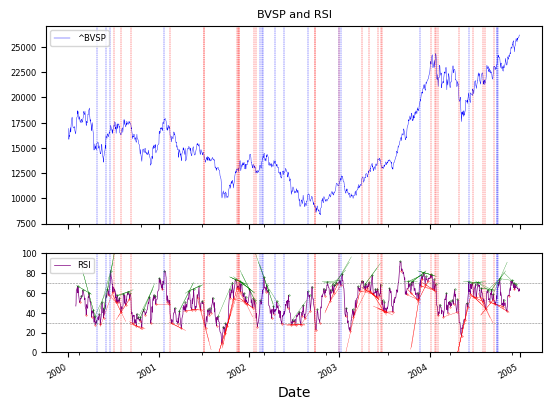

In [38]:


plt.style.use('default')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker_clean + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)

# ----------------------------------------------------------------   
# Plotando o as linhas de sobrecompra (RSI = 70) e sobrevenda (RSI = 30)
# ----------------------------------------------------------------   
ax3.axhline(70, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrecompra
ax3.axhline(30, color='gray', linestyle='--', linewidth = 0.4)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)
ax1.legend(loc='upper left', fontsize=6)
ax3.legend(loc='upper left', fontsize=6)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

idx = data.index

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_bottom_idx], data['RSI'][top.top_bottom_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.top_bottom_idx], data['RSI'][bottom.top_bottom_idx], marker='o', color='red', markersize=0.3)
    
# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(expurgado_trendlines_suporte_df)):
    row = expurgado_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = min(len(datas)-1, int(row['x_max']))
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.2)

# ----------------------------------------------------------------   
# Plotar as retas de resistência do RSI
# ----------------------------------------------------------------

for i in range(len(expurgado_trendlines_resistencia_df)):
    row = expurgado_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = min(len(datas)-1, int(row['fim_janela']))
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.2)

# ----------------------------------------------------------------
# Desenhando as linhas indicativas de rompimento
# ----------------------------------------------------------------
for _, row in primeiros_breaks_down_df.iterrows():
    x_rompimento = row['x_rompimento']

    # Obter a data correspondente ao índice x_rompimento
    data_x_rompimento = data.index[int(x_rompimento)]

    # Adicionar linha vertical vermelha para os rompimentos das linhas de resistência
    ax1.axvline(x=data_x_rompimento, color='red', linestyle='--', linewidth=0.3)
    ax3.axvline(x=data_x_rompimento, color='red', linestyle='--', linewidth=0.3)

for _, row in primeiros_breaks_up_df.iterrows():
    x_rompimento = row['x_rompimento']

    # Obter a data correspondente ao índice x_rompimento
    data_x_rompimento = data.index[int(x_rompimento)]

    # Adicionar linha vertical azul para os rompimentos das linhas de suporte
    ax1.axvline(x=data_x_rompimento, color='blue', linestyle='--', linewidth=0.3)
    ax3.axvline(x=data_x_rompimento, color='blue', linestyle='--', linewidth=0.3)

# ----------------------------------------------------------------
# Ajustar o título e diminuir o tamanho da fonte
# ----------------------------------------------------------------
ax1.set_title(ticker_clean + " and RSI", color='black', fontsize=8)

# ----------------------------------------------------------------
# Reduzir o tamanho da fonte dos valores da escala
# ----------------------------------------------------------------
ax1.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax1
ax3.tick_params(axis='both', which='major', labelsize=6)  # Alterar tamanho da fonte dos ticks de ax3

# ----------------------------------------------------------------
# Salvar e plotar
# ----------------------------------------------------------------

file_name = f'graficos_gerados/rompimentos_{ticker_clean}.png'
fig.savefig(file_name, dpi=300)  # Salva a figura como um arquivo PNG com alta resolução
plt.show()

# ----------------------------------------------------------------

Juntando os breaks

In [39]:
# Concatenar os dois DataFrames
breaks_df = pd.concat([primeiros_breaks_down_df, primeiros_breaks_up_df])

# Ordenar o DataFrame resultante pela coluna 'ponto'
breaks_df = breaks_df.sort_values(by='ponto')

# Resetar o índice se necessário
breaks_df = breaks_df.reset_index(drop=True)

breaks_df.to_csv('dados_csv_produzidos/breaks.csv', index=True)

Criando o Backtest

In [40]:
def estrategia(ind, valor, pos_ant, ini_posicao_ant, valor_posicao_ant, brs_df, sl, tp):
    
    # Verificar se existe uma linha em brs_df com 'ponto' igual a ind
    linha = brs_df[brs_df['ponto'] == ind]

    if pos_ant == 0:
        if not linha.empty:
            evento = linha.iloc[0]['evento']
            if evento == 1:
                return -1, ind, valor
            elif evento == 2:
                    return 1, ind, valor
            else:
                return 0, None, None

    elif pos_ant == -1:
        if not linha.empty:
            evento = linha.iloc[0]['evento']
            if evento == 1:
                if valor/valor_posicao_ant-1 > tp:
                    return 0, None, valor
                elif valor/valor_posicao_ant-1 < sl:
                    return 0, None, valor
                else:
                    return -1, ini_posicao_ant, valor_posicao_ant
            elif evento == 2:
                return 0, None, valor
        else:
            return -1, ini_posicao_ant, valor_posicao_ant

    elif pos_ant == 1:
        if not linha.empty:
            evento = linha.iloc[0]['evento']
            if evento == 2:
                if valor - valor_posicao_ant > tp:
                    return 0, None, valor
                elif valor - valor_posicao_ant < sl:
                    return 0, None, valor
                else:
                    return 1, ini_posicao_ant, valor_posicao_ant
            elif evento == 1:
                return 0, None, valor
        else:
            return 1, ini_posicao_ant, valor_posicao_ant

    # Para qualquer outro caso
    return pos_ant, ini_posicao_ant, valor_posicao_ant

data = data.reset_index(drop=True)

# Inicializar as colunas
data['posicao'] = 0
data['ini_posicao'] = None
data['valor_posicao'] = None

# Valores iniciais
pos_ant = 0
ini_posicao_ant = None
valor_posicao_ant = None

# Iterar sobre o DataFrame
for ind in range(1, len(data)):  # Começa a partir da segunda linha
    valor = data.loc[ind, 'Close']
    pos_ant, ini_posicao_ant, valor_posicao_ant = estrategia(ind, valor, pos_ant, ini_posicao_ant, valor_posicao_ant, breaks_df, sl, pt)

    # Atualizar as colunas no DataFrame
    data.at[ind, 'posicao'] = pos_ant
    data.at[ind, 'ini_posicao'] = ini_posicao_ant
    data.at[ind, 'valor_posicao'] = valor_posicao_ant

data.to_csv('dados_csv_produzidos/back_test_df.csv', index=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Calculando Quota da Estratégia

In [ ]:
# Calcula 'retorno_ind' como antes
data['retorno_ind'] = data['Close'].pct_change()
data['retorno_ind'].iloc[0] = 0

# Utiliza o 'retorno_ind' da linha seguinte e 'posicao' da linha atual
data['retorno_estrategia'] = data['retorno_ind'].shift(-1) * data['posicao']

# Para a última linha, como não há 'retorno_ind' seguinte, você pode definir 'retorno_estrategia' como 0 (ou outro valor conforme a necessidade)
data['retorno_estrategia'].iloc[-1] = 0

# Calcula 'Quota' como antes
data['Quota'] = 100
for i in range(1, len(data)):
    data['Quota'].iloc[i] = data['Quota'].iloc[i - 1] * (1 + data['retorno_estrategia'].iloc[i])

data['retorno_max'] = data['Quota'].cummax()/100-1

data['DD'] = (data['Quota']/100)/(data['retorno_max']+1)-1

# Inicializa a coluna 'DDD' com zeros
data['DDD'] = 0

# Itera pelo DataFrame, aplicando a lógica desejada para a coluna 'DDD'
for i in range(1, len(data)):
    
    if abs(data['DD'].iloc[i])<0.0000001:
        data['DDD'].iloc[i] = 0
    else:
        data['DDD'].iloc[i] = data['DDD'].iloc[i - 1] + 1

data.to_csv('dados_csv_produzidos/quotas.csv', index=True)




C:\Users\User\AppData\Local\Temp\ipykernel_21852\893831027.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['retorno_ind'].iloc[0] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_21852\893831027.py:3: SettingWithCopyWarning: 
A value 